In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

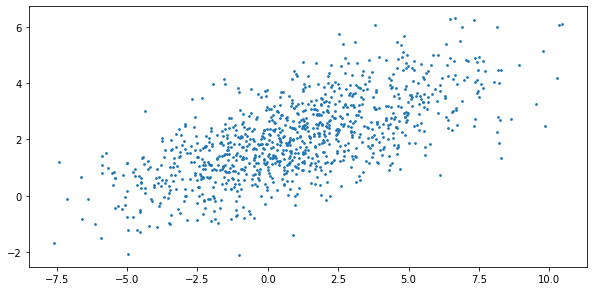

In [2]:
## creazione di una distribuzione gaussiana bidimensionale
m = (1, 2)
sigma = [[10, 3], [3, 2]]
samples = np.random.multivariate_normal(mean=m, cov=sigma, size = 1_000)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=samples[:, 0], y=samples[:,1], s=3)

In [3]:
## trasformazione secondo gli assi principali
sigma_ = np.cov(samples.T)
m_ = np.mean(samples, axis=0)

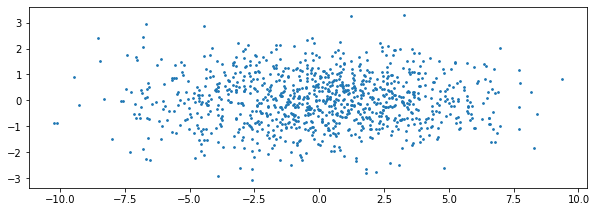

In [4]:
w, v = np.linalg.eigh(sigma_)
w = np.flip(w)
v = np.fliplr(v)
pca_samples = (v.T@(samples.T - m_.reshape(2, 1))).T
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=pca_samples[:, 0], y=pca_samples[:,1], s=3)

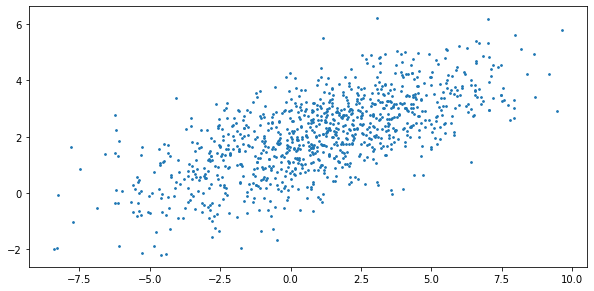

In [5]:
w, v = np.linalg.eig(sigma_)
original_samples = (v@pca_samples.T + m_.reshape(2, 1)).T
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=original_samples[:, 0], y=original_samples[:,1], s=3)

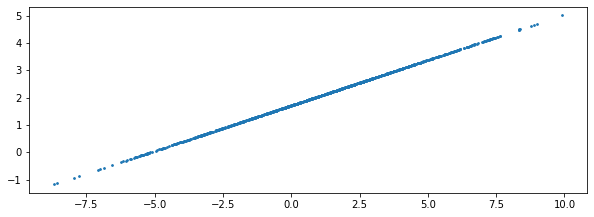

In [7]:
w, v = np.linalg.eig(sigma_)
original_samples = (v[:, 0:1]@pca_samples.T[0:1, :] + m_.reshape(2, 1)).T
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=original_samples[:, 0], y=original_samples[:,1], s=3)

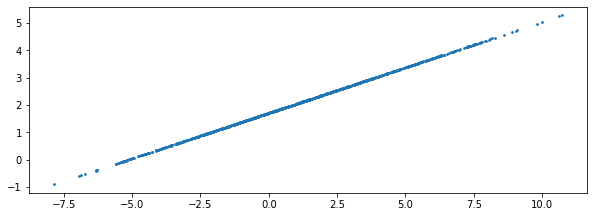

In [8]:
pca = PCA(n_components=1, )
pca.fit(samples)
pca_samples = pca.transform(samples)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=pca.inverse_transform(pca_samples)[:, 0], y=pca.inverse_transform(pca_samples)[:, 1], s=3)

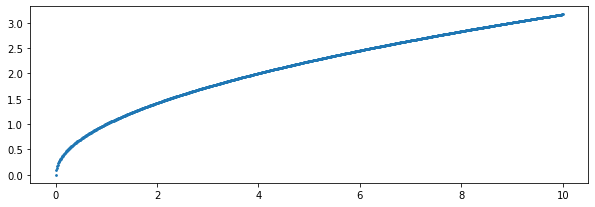

In [9]:
## covarianza zero non significa indipendenza
x = np.linspace(0, 10, 1000)
y = x**(1/2)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=x, y=y, s=3)

In [10]:
samples = np.stack([x, y])
sigma_ = np.cov(samples)
m_ = np.mean(samples, axis=1)

In [11]:
sigma_

array([[8.35837506, 2.11620609],
       [2.11620609, 0.55842304]])

In [12]:
samples.shape

(2, 1000)

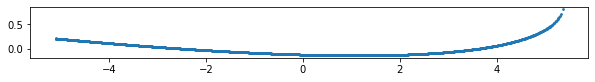

In [13]:
w, v = np.linalg.eigh(sigma_)
w = np.flip(w)
v = np.fliplr(v)
pca_samples = (v.T@(samples - m_.reshape(2, 1))).T
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_aspect('equal')
plt.scatter(x=pca_samples[:, 0], y=pca_samples[:,1], s=3)

In [14]:
## PCA per il riconoscmento di immagini
import mnist_reader

In [16]:
X_train, y_train = mnist_reader.load_mnist(path=r'F:\Documenti\machine_learning_avanzato\data\fashion-mnist-master')

X_test, y_test = mnist_reader.load_mnist(path=r'F:\Documenti\machine_learning_avanzato\data\fashion-mnist-master', kind='t10k')

In [19]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

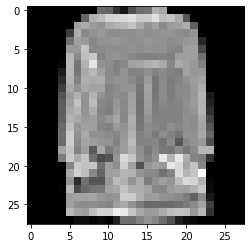

In [35]:
pipeline = Pipeline([
    ('PCA', PCA()),
    ('classifier', neighbors.KNeighborsClassifier())
    ]
)

In [47]:
params = {
    'PCA__n_components': range(10, 40, 20),
    'classifier__n_neighbors': range(1, 20, 5)
}

In [48]:
grid = GridSearchCV(pipeline, param_grid=params, cv=2, verbose=2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] PCA__n_components=10, classifier__n_neighbors=1 .................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] .. PCA__n_components=10, classifier__n_neighbors=1, total=   4.1s
[CV] PCA__n_components=10, classifier__n_neighbors=1 .................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[CV] .. PCA__n_components=10, classifier__n_neighbors=1, total=   4.6s
[CV] PCA__n_components=10, classifier__n_neighbors=6 .................
[CV] .. PCA__n_components=10, classifier__n_neighbors=6, total=   4.7s
[CV] PCA__n_components=10, classifier__n_neighbors=6 .................
[CV] .. PCA__n_components=10, classifier__n_neighbors=6, total=   4.7s
[CV] PCA__n_components=10, classifier__n_neighbors=11 ................
[CV] . PCA__n_components=10, classifier__n_neighbors=11, total=   5.0s
[CV] PCA__n_components=10, classifier__n_neighbors=11 ...............

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('PCA', PCA()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'PCA__n_components': range(10, 40, 20),
                         'classifier__n_neighbors': range(1, 20, 5)},
             verbose=2)

In [49]:
grid.best_score_

0.8428333333333333

In [50]:
grid.best_estimator_.score(X_test, y_test)

0.8412

In [51]:
grid.best_params_

{'PCA__n_components': 30, 'classifier__n_neighbors': 11}